# Questão 1

In [120]:
import sympy as sp
import numpy as np
from sympy import *
from utils import symdisp, symplot, round_expr

In [121]:
m = [1,4]
r1 = 1+m[0];r2 = 1+m[1];display(r1,r2)
v = 10
L1 = 100*(10**-3) ; L2 = 25*(10**-3)
#Corrente inicial no indutor
Io = 0

2

5

# a)

In [122]:
i1 = v/(r1+(2*r2));symdisp('i_1 (0^+)= ',round(i1,3),'A')
i2 = i1; symdisp('i_2 (0^+)= ',round(i2,3),'A')
iL = 0; symdisp('i_L (0^+)= ',round(iL,3),'A')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# c)

In [123]:
#resistencia equivalente 
Rth = ((r1*2*r2)/(r1+(2*r2)))+ r1 + r2; symdisp('R_{Th} = ',round(Rth,3),'Ω')
#Tensão de thevenin
Vth = ((r1*2*r2)/(r1+(2*r2))) * 5;symdisp('V_{Th} = ',round(Vth,3),'V')
# Indutor equivalente
Leq = L1 + L2; symdisp('L_{eq} = ',Leq*10**3,'mH')
# constatnet de tempo
τ = Leq/Rth ; symdisp('τ = ',round(τ*10**3,3),'ms')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# d)

Equação para circuito RL - resposta ao Degrau


<IPython.core.display.Math object>

Tensão no indutor 1 


<IPython.core.display.Math object>

Tensão no indutor 2


<IPython.core.display.Math object>

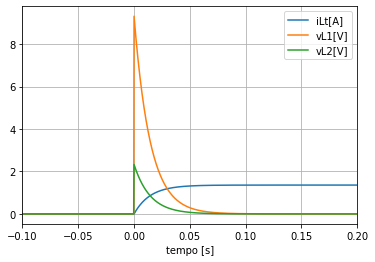

In [131]:
t = sp.symbols('t', real = True)
print('Equação para circuito RL - resposta ao Degrau')
iLt = (Io - (Vth/Rth))*sp.exp(-t/τ) + (Vth/Rth); symdisp('i_L(t) = ',round_expr(iLt,3) , 'A')
iLt_plot = sp.Piecewise((0,t<0),(round_expr(iLt,3), t>= 0))


print('Tensão no indutor 1 ')
vL1 = L1*sp.diff(iLt,t); symdisp('v_{L1}(t) = ',round_expr(vL1,3), 'V')
vL1t_plot = sp.Piecewise((0,t<0),(round_expr(vL1,3), t>= 0))

print('Tensão no indutor 2')
vL2 = L2*sp.diff(iLt,t); symdisp('v_{L2}(t) = ',round_expr(vL2,3), 'V')
vL2t_plot = sp.Piecewise((0,t<0),(round_expr(vL2,3), t>= 0))

intervalo = np.linspace(-0.1,0.2, 1000)
symplot(t,[iLt_plot,vL1t_plot,vL2t_plot],intervalo,['iLt[A]','vL1[V]','vL2[V]'])

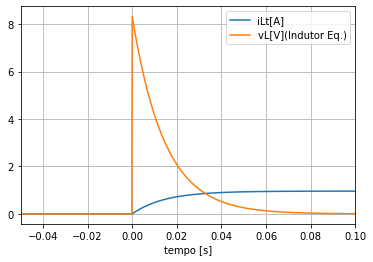

In [125]:
vLt_plot = sp.Piecewise((0,t<0),(round_expr(Leq*sp.diff(iLt,t),3), t>= 0))
intervalo = np.linspace(-0.05,0.1, 1000)
symplot(t,[iLt_plot,vLt_plot],intervalo,['iLt[A]','vL[V](Indutor Eq.)'])

In [126]:
vL1_inicial = vL1.evalf(subs={t:0}); 
symdisp('v_{L1}(0) = ',round_expr(vL1_inicial,3), 'V')
symdisp('\\frac{v_{L1}}{2}(0) = ',round_expr(vL1_inicial/2,3), 'V')

vL2_inicial = vL2.evalf(subs={t:0}); 
symdisp('v_{L2}(0) = ',round_expr(vL2_inicial,3), 'V')
symdisp('\\frac{v_{L2}}{2}(0) = ',round_expr(vL2_inicial/2,3), 'V')


eqVL1 = sp.Eq(vL1,vL1_inicial/2)
eqVL2 = sp.Eq(vL2,vL2_inicial/2)

tL1 = sp.nsolve(eqVL1,t,(0,10),solver = 'bisect'); symdisp('t_{L1} = ',round(tL1*10**3), 'ms')
tL2 = sp.nsolve(eqVL2,t,(0,10),solver = 'bisect'); symdisp('t_{L2} = ',round(tL2*10**3), 'ms')



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

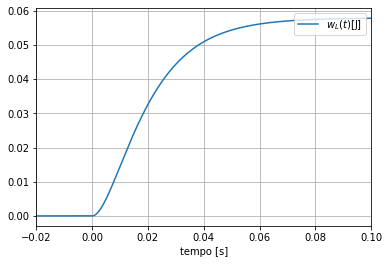

In [127]:
# tensão no indutor equivalente
vL = Leq*sp.diff(iLt,t); symdisp('v_L(t)=',round_expr(vL,3),'V')
#potencia no indutores
pL = vL*iLt; symdisp('p_L(t)=',round_expr(pL,3),'W'); 
# Energia Final nos indutores
wLt = sp.integrate(pL,(t,0,t)); symdisp('w_L(t) = ',round_expr(wLt.simplify(),3),'J')
wL_final = sp.integrate(pL,(t,0,oo)); symdisp('w_L(oo) = ',round(wL_final*10**3,3),'mJ')
symdisp('\\frac{w_L(oo)}{2} = ',round((wL_final/2),3),'J')

eqwL = sp.Eq(wLt,wL_final/2)
tL = sp.nsolve(eqwL,t,(0,1),solver = 'bisect'); symdisp('t_{L} = ',round(tL*10**3,3), 'ms')

wLt_plot = sp.Piecewise((0,t<0),(round_expr(wLt,3), t>= 0))
intervalo = np.linspace(-0.02,0.1, 1000)
symplot(t,wLt_plot,intervalo,'$w_L(t)$[J]')

# Questão 2

# a)

In [128]:
v = 10
L = 200*10**-3
c = 20*10**-6
ra = sp.sqrt(3)*r1+sp.sqrt(2)*r2;symdisp('R_a = ',round(ra,3),'Ω')
rb = 4*r2;                       symdisp('R_b = ',round(rb,3),'Ω')
rc = 2*sp.sqrt(5)*r1;            symdisp('R_c = ',round(rc,3),'Ω')   
i0 = 10/(ra+rb);                 symdisp('i_L(0^+) = ',round(i0*10**3,3),'mA')
print('A tensão no capacitor será a mesma tensão aplicada no resistor Rb, logo:')
vrb = i0*rb;                     symdisp('v_C(0^+) = v_{R_b}  = ',round(vrb,3),'V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A tensão no capacitor será a mesma tensão aplicada no resistor Rb, logo:


<IPython.core.display.Math object>

# Itens: b) e c) RLC - Resposta Natural em Série

Fator de Amortecimento


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frequência de Ressonância


<IPython.core.display.Math object>

<IPython.core.display.Math object>

RESPOSTA SUBAMORTECIDA

Forma geral da solução:


<IPython.core.display.Math object>

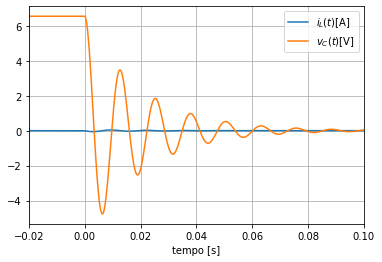

In [139]:
t0 = 0
Rth = rb
vth = vrb

#Fator de amortecimento
α = rb/(2*L);
print('Fator de Amortecimento')
symdisp('α = ',round(α,3),'\\frac{rad}{s}')
symdisp('α^2 = ',round(α**2,3),'\\frac{rad}{s}')

print('Frequência de Ressonância')
ω = 1/sp.sqrt(L*c)
symdisp('ω_o = ',round(ω,3),'\\frac{rad}{s}')
symdisp('ω_o^2 = ',round(ω**2,3),'\\frac{rad}{s}')


if α**2 > ω**2:
    print('RESPOSTA SUPERAMORTECIDA')
    s1 = -α + sp.sqrt(α**2 - ω**2)
    s2 = -α - sp.sqrt(α**2 - ω**2)
    A1, A2 = sp.symbols('A1 ,A2')
    # expressão geral da resposta superamortecida
    iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL,3), 'A')

elif α**2 < ω**2:
    print('RESPOSTA SUBAMORTECIDA')
    ωd = sp.sqrt(ω**2 - α**2 )
    B1, B2 = sp.symbols('B1 ,B2')
    B1 = i0
    B2 = ((1/L)*(-Rth*i0 - vth)+(α*B1))/ωd
    iL = sp.exp(-α*t)*(B1*sp.cos(ωd*t) + B2*sp.sin(ωd*t))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

elif α**2 == ω**2:
    print('RESPOSTA CRITICAMENTE AMORTECIDA')
    D1, D2 = sp.symbols('D1 ,D2')
    D2 = i0
    D1 = ((1/L)*(-Rth*i0 - vth)+(α*D2))/ωd
    iL = sp.exp(-α*t)*(D1*t + B2)
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

#tensão no capacitor 0<= t <= 1
vct = (1/c)*sp.integrate(iL,(t,0,t))+vth

iL_plot  = sp.Piecewise((i0,t<=0),(round_expr(iL.simplify(),3), t<1))
vct_plot = sp.Piecewise((vth,t<=0),(round_expr(vct.simplify(),3), t<1))

intervalo = np.linspace(-0.02,0.1, 1000)
symplot(t,[iL_plot,vct_plot],intervalo,['$i_L(t)$[A]','$v_C(t)$[V]'])



# d)

Fator de Amortecimento


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Frequência de Ressonância


<IPython.core.display.Math object>

<IPython.core.display.Math object>

RESPOSTA SUBAMORTECIDA

Forma geral da solução:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

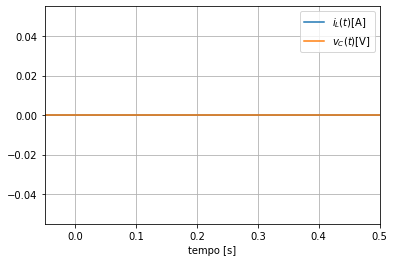

In [130]:
t0 = 0
Rth = (rb*rc)/(rb+rc)
vth = 0
i0 = 0

#Fator de amortecimento
α = rb/(2*L);
print('Fator de Amortecimento')
symdisp('α = ',round(α,3),'\\frac{rad}{s}')
symdisp('α^2 = ',round(α**2,3),'\\frac{rad}{s}')

print('Frequência de Ressonância')
ω = 1/sp.sqrt(L*c)
symdisp('ω_o = ',round(ω,3),'\\frac{rad}{s}')
symdisp('ω_o^2 = ',round(ω**2,3),'\\frac{rad}{s}')


if α**2 > ω**2:
    print('RESPOSTA SUPERAMORTECIDA')
    s1 = -α + sp.sqrt(α**2 - ω**2)
    s2 = -α - sp.sqrt(α**2 - ω**2)
    A1, A2 = sp.symbols('A1 ,A2')
    # expressão geral da resposta superamortecida
    iL = A1*sp.exp(s1*(t-t0)) + A2*sp.exp(s2*(t-t0))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL,3), 'A')

elif α**2 < ω**2:
    print('RESPOSTA SUBAMORTECIDA')
    ωd = sp.sqrt(ω**2 - α**2 )
    B1, B2 = sp.symbols('B1 ,B2')
    B1 = i0
    B2 = ((1/L)*(-Rth*i0 - vth)+(α*B1))/ωd
    iL = sp.exp(-α*t)*(B1*sp.cos(ωd*t) + B2*sp.sin(ωd*t))
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

elif α**2 == ω**2:
    print('RESPOSTA CRITICAMENTE AMORTECIDA')
    D1, D2 = sp.symbols('D1 ,D2')
    D2 = i0
    D1 = ((1/L)*(-Rth*i0 - vth)+(α*D2))/ωd
    iL = sp.exp(-α*t)*(D1*t + B2)
    print('\nForma geral da solução:')
    symdisp('i_L(t) = ', round_expr(iL.simplify(),3), 'A')

#tensão no capacitor 0<= t <= 1
vct = (1/c)*sp.integrate(iL,(t,0,t))+vth

iL_plot  = sp.Piecewise((i0,t<=0),(round_expr(iL.simplify(),3), t<1))
symdisp('i_L(t) = ',round_expr(iL_plot.simplify(),2),'A')

vct_plot = sp.Piecewise((vth,t<=0),(round_expr(vct.simplify(),3), t<1))
symdisp('v_C(t) = ',round_expr(vct_plot.simplify(),2),'V')


intervalo = np.linspace(-0.05,0.5, 1000)
symplot(t,[iL_plot,vct_plot],intervalo,['$i_L(t)$[A]','$v_C(t)$[V]'])

